Présentation Jupyter notebook   
=========================  
*B. DARID - 3 juillet 2020*
![logo](logo2.png)

## Qu'est-ce que Jupyter ?
Jupyter est un environnement développement interactif basé sur une page web en combinant code, texte, image, graphique etc.  
Le projet est né en 2015 et permet à ce jour la programmation en plusieurs dizaines de langages. Il est très utilisé dans le monde de la recherche (*data science* notamment) et dans l'enseignement supérieur.
![fonctionnalites](jupyter_features.png)

## Comment l'utiliser: installer ou ... pas?
Plusieurs possibilités:  
* on dispose de la distribution Anaconda, dans ce cas il n'y a rien à faire; Jupyter notebook est accessible via Anaconda Navigator.
* on dispose d'un installation python fonctionnelle: il est préférable de passer par le gestionnaire de paquet de python `pip` avec la commande ci-après (tapée dans un terminal ou une invite de commande, selon la plateforme)  
```python
pip install jupyter
```
* sans installation, en ligne: [Nbviewer](https://nbviewer.jupyter.org/) pour visualiser uniquement ou [Binder](https://mybinder.org/) pour pouvoir exécuter ou encore en utilisant les services de [Google](https://colab.research.google.com/notebooks/intro.ipynb) (merci à Dominique pour l'info :) ).

## Quelles sont ses principales fonctionalités ?
L'élément essentiel dans Jupyter notebook, au niveau de l'interface utilisateur est **la cellule**. 

L'insertion d'une nouvelle cellule se fait avec le menu. Un clic dans celle-ci permet d'y apporter des modifications. Il faut, par ailleurs, choisir le type de contenu que la cellule va accueillir en sélectionnant dans la barre d'outils "code" ou "Markdown".

Une cellule doit être *exécutée* avec la séquence "Shitf Entrée" ou "Ctrl Entrée" ou avec la barre d'outils.

### Cellules de texte enrichi
Une cellule peut contenir du texte brut, sans aucun formatage particulier (par exemple cette ligne). On peut quand même l'enrichir de façon minimale en utilisant un langage de balisage léger: le markdown.  
On peut **mettre en gras**, *en italique*, créer des listes:
* Premier item
* Deuxième item

On peut insérer des images avec la séquence `![texte](chemin/vers/mon_image.png)`, un hyperlien avec `[texte_a_afficher](url)`, introduire du code $\LaTeX$.  
On peut aussi introduire des portions de code (python par exemple) sans perdre le formatage d'origine (indentation):
```python
def fonction_inutile():
    ne_fait_rien = True
    return f"Mon nom est: {fonction_inutile.__name__}, mon adresse est {fonction_inutile}"
```  

Pour voir le texte réellement saisi dans une cellule, double cliquer sur celle-ci.  
[Documentation Markdown](https://daringfireball.net/projects/markdown/syntax)

### Cellules de code

In [1]:
def dropdup(t):
    """
    Supprime les doublons d'un tableau et renvoie une nouveau tableau
    t: tableau d'entiers ou flottants
    """
    r = []#le tableau résultat    
    tmp = sorted(t)#Il est plus facile d'éliminer les doublons d'un tableau trié
    i = 0
    while i < len(t):
        j = i + 1
        while j < len(t) and tmp[j] == tmp[i]:
            j = j + 1
        r.append(tmp[j - 1])
        i = j
    return r

In [2]:
#Cellule de tests
t1 = [2, 2, 2, 8, 4, 5, 9, 3, 9, 6, 9]
dropdup(t1)

[2, 3, 4, 5, 6, 8, 9]

### Cellule de code avec des "objets" externes embarqués
#### Page web embarquée

In [3]:
from IPython.display import IFrame


IFrame('https://jupyter-notebook.readthedocs.io/en/stable/', width=800, height=450)

#### Vidéo Youtube embarquée

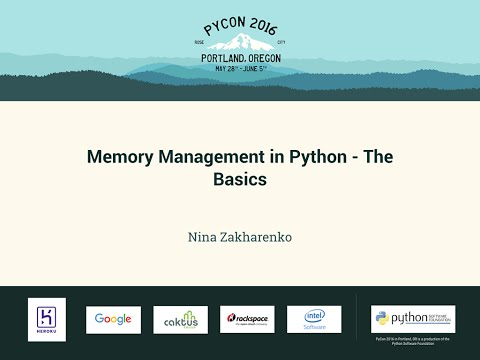

In [4]:
from IPython.display import YouTubeVideo


YouTubeVideo('F6u5rhUQ6dU', width=800, height=450)

#### Pdf embarqué

In [5]:
IFrame('https://info-llg.fr/commun-mpsi/pdf/05.listes.pdf',\
      width=800, height=450)

#### Animation pythontutor embarquée

In [21]:
from metakernel import register_ipython_magics
register_ipython_magics()

In [23]:
%%tutor
l1 = [[0] * 3] * 3
print(l1)
l2 = l1
l2[2][2] = -10
print(l1)
print(l2)

#### Carte embarquée

In [24]:
import folium


lat, lon = -21.29, 55.46
carte = folium.Map(location=[lat, lon], zoom_start=12)
carte

#### Code avec widgets

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


%matplotlib notebook
def sinusoide(t, f=50, phi=np.pi/2):
    """
    Trace deux sinusoides sin(2*pi*f*t) et sin(2*pi*f*t - phi)
    t: tableau (numpy) de flottants,
    f fréquence
    """
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.grid()
    u1, = ax.plot(t, np.sin(2 * np.pi* f * t))
    u2, = ax.plot(t, 0.7 * np.sin(2 * np.pi* f * t - phi))

    def update(f):
        """
        Raffraichi la figure quand l'utilisateur agit sur la fréquence
        """
        u1.set_ydata(np.sin(2 * np.pi * f * t))
        u2.set_ydata(0.7 * np.sin(2 * np.pi * f * t - phi))
        fig.canvas.draw_idle()

    interact(update, f=f)

<IPython.core.display.Javascript object>


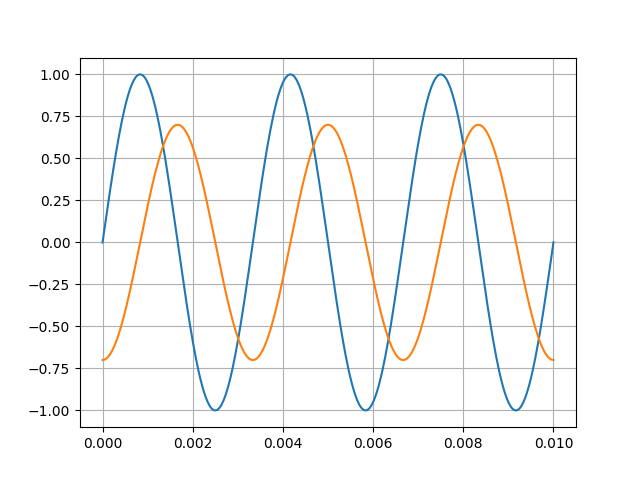

interactive(children=(IntSlider(value=300, description='f', max=900, min=-300), Output()), _dom_classes=('widg…

In [32]:
t = np.linspace(0, 0.01, 500)

sinusoide(t, 300, np.pi/2)

### Cellules "magic system"

Voir la section **Liens**, PyCon 2015

### Exportation vers des formats différents

Un notebook jupyter peut être exporté en un nombre non négligeable de format.  
![exportation](export.png)  

Attention tout de même, certains formats nécessitent l'installation d'applications annexes (*l'export en pdf via pdflatex est disponible avec l'installation d'une distribution LaTeX par exemple*).

## Utilisation de Jupyter à travers des exemples

### Exemple 1: décharge d'un condensateur

On étudie la décharge d’un condensateur de capacité $C$ à travers une résistance $R$. La tension $u(t)$
aux bornes du condensateur est régie par l’équation différentielle:
$$
\frac{du(t)}{dt} = f(t, u(t))=-\frac{u(t)}{\tau}
$$

La méthode de résolution d'Euler revient à faire l'approximation:  

$$
\frac{du(t)}{dt}\Big|_{\ t=t_i}\approx \frac{u(t_{i+1})-u(t_{i})}{h}
$$

1. Montrer que la relation de récurrence donnant la tension est:
$$
u_{i+1} = u_{i}\times (1- \frac{h}{\tau})
$$

2. Coder une fonction `euler` qui permet de calculer $u(t_i)_{i \in [0\cdots n-1]}$ et qui a pour signature:
```python
euler(u0, t0, h, n, tau)
```

3. Tracer les solutions calculées et théoriques

In [28]:
from math import exp


def euler(u0, t0, h, n, tau):
    """
    methode d'euler, renvoie un tuple dont les composantes sont des tableaux 
    de solutions u(t), uthéorique(t) et t
    u0, t0: conditions initiales, flottants
    h: pas, flottant
    n: nombre de points, entier naturel
    tau: constante de temps, flottant
    """ 
    u, t = [0] * n, [0] * n
    u[0], t[0] = u0, t0
    for i in range(n - 1):
        t[i + 1] = t[i] + h
        u[i + 1] = (1 - h / tau) * u[i]
    utheor = list(map(lambda x: u0 * exp(-x / tau), t))
    return (u, utheor, t)

In [29]:
import matplotlib.pyplot as plt


%matplotlib notebook
def trace(x, y1, y2):
    """
    Réalise la tracé de y en fonction de y
    """
    #figure, axes = plt.subplots(figsize=(8, 8))
    figure, axes = plt.subplots()
    axes.plot(x, y1, label='Valeurs calculées')
    axes.plot(x, y2, label='Valeurs théoriques')
    axes.set_xlabel('Temps $t(s)$')
    axes.set_ylabel('Tension $u_c(V)$')
    axes.set_title("Décharge d'un condensateur")
    axes.legend(loc='upper center')
    axes.grid()
    plt.show()

<IPython.core.display.Javascript object>


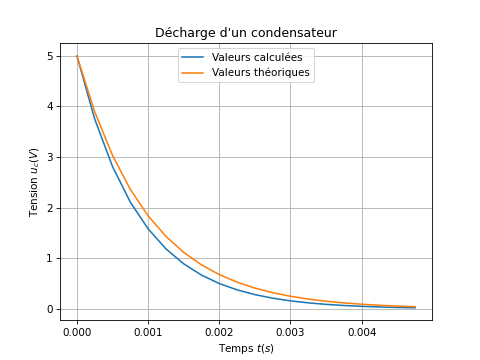

In [30]:
#Cellule de tests

u, utheor, t = euler(5, 0.0, 2.5e-4, 20, 1.0e-3)
trace(t, u, utheor)

### Exemple 2: valeur de $\pi$ avec une série (Leibniz)

On rappelle la formule de Leibniz:  

$$
\frac{\pi}{4}=\arctan(1)=\sum\limits_{k=0}^{\infty}\frac{(-1)^k}{2k+1}
$$

1. Coder une fonction `serie_arctan(n)` avec `n` entier naturel, qui retourne $\arctan{1}$;  

2. Evaluer l'erreur commise sur la valeur de $\pi$ lorsque $n=500$. On pourra tracer par exemple $\log |\pi -4\times\mathrm{serie\_arctan(n)}|$ en fonction de $n$.  

3. Conclusion.

In [14]:
"""
Le calcul de la série se fera en utilisant le module decimal, qui a l'avantage
de produire des "arrondis mathématiquement corrects".
Documentation: https://docs.python.org/fr/3.8/library/decimal.html
"""

import sympy
import decimal

decimal.getcontext().prec = 500#précision à 500 décimales
PI = sympy.pi.evalf(500)#pi avec 500 décimales

def serie_arctan(n):
    """
    Retourne arctan(n) calculé avec la série de leibniz.
    n: entier naturel
    """
    somme = decimal.Decimal(0)
    for k in range(n):
        somme += (decimal.Decimal('-1') ** k) / (2 * k + 1)
    return somme

In [15]:
1.2 * 3 -3

0.5999999999999996

In [16]:
import math
import matplotlib.pyplot as plt

%matplotlib notebook

def erreur(n):
    return abs(PI - 4 * serie_arctan(n))

def trace(n):
    """
    Trace erreur = f(n)
    """
    approx = [math.log10(erreur(i)) for i in range(1, n + 1)]
    figure, axes = plt.subplots()
    axes.plot(list(range(1, n + 1)), approx, label='$\log |\pi -4\cdot{serie\_arctan(n)}|$')
    axes.set_xlabel('$n$')
    axes.set_title("Evolution de l'erreur")
    axes.legend(loc='upper center')
    axes.grid()
    plt.show()


<IPython.core.display.Javascript object>


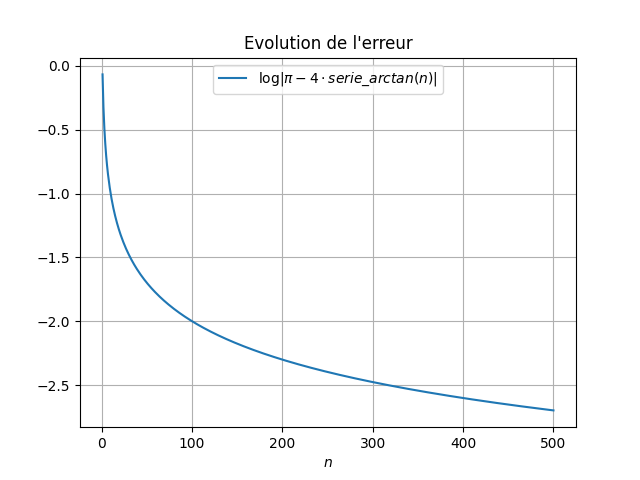

In [17]:
trace(500)

### Analyse spectrale
(**A retravailler, valeurs des harmoniques douteuses**)

<IPython.core.display.Javascript object>


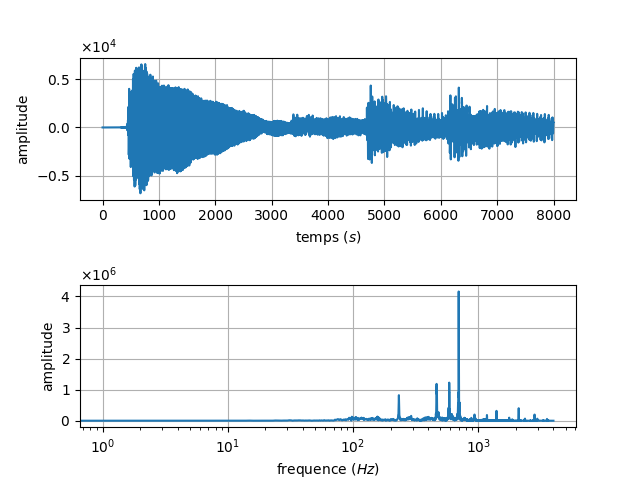

In [18]:
import wave
import numpy as np


wr = wave.open('piano_8kHz_16bits.wav', 'r')
sz = 8000
da = np.frombuffer(wr.readframes(sz), dtype=np.int16)
left, right = da[0::2], da[1::2]
lf, rf = abs(np.fft.rfft(left)), abs(np.fft.rfft(right))


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.6)
ax1.set_xlabel('temps $(s)$')
ax1.set_ylabel('amplitude')
ax1.ticklabel_format(axis='y', style='sci', scilimits=(4,4), useMathText=True)
ax1.grid(True)
ax1.plot(left)
ax2.set_xscale('log')
ax2.set_xlabel('frequence $(Hz)$')
ax2.set_ylabel('amplitude')
ax2.ticklabel_format(axis='y', style='sci', useMathText=True)
ax2.grid(True)
ax2.plot(lf)

fig.savefig('spectre.png')

## Avantages / inconvénients

### Avantages
Parmi les avantages on peut citer:

* simplicité de l'interface (navigateur web, outil d'utilisation courante);
* Présentation claire et agréable;
* La séparation de la feuille de travail en "cellules" est en parfait accord avec le style de programmation modulaire que l'on doit privilégier;  
* Un très large choix de type de conversion de son document (html, pdf, tex, py etc ..).

### Inconvénient

Installation délicate dans l'environnement de travail du lycée. L'installation de paquets nécessite de passer les paramètres du proxy en option du gestionnaire `pip`.

## Bonus: le Jupyter book ou comment publier son travail (via github.io) 

Le support de diffusion (*github.io*) nécessite un compte github.  
On crée le dossier de travail avec `jupyter-book` :  
```python
jupyter-book create presentation
```

On obtient un dossier `presentation` avec plusieurs fichiers dont `_toc.yml` qui définit la structure du document.  On y ajoute les fichiers relatifs à notre notebook puis on lance Sphinx avec la commande:  
```bash
jupyter-book build presentation/
```

On crée un dépot sur Github via l'interface graphique en ligne, puis cloner ce dépot sur le disque local:
```bash
git clone https://github.com/brunodrd/jupyter.git
```
Un dossier `jupyter` est créé et on y copie tous les fichiers présents dans `presentation/_build/html/` :  
```bash
cp -r presentation/_build/html/* jupyter/
```

La dernière étape consiste à envoyer l'ensemble des fichiers présents dans `jupyter/` sur github:  
```bash
cd jupyter
git add ./*
git commit -m "Ma présentation!"
git push
```

puis:  
```bash
ghp-import -n -p -f ../presentation/_build/html
```

## Liens

### Astuces Jupyter

In [19]:
from IPython.display import IFrame


IFrame('http://arogozhnikov.github.io/2016/09/10/jupyter-features.html', width=800, height=450)

### PyCon 2015

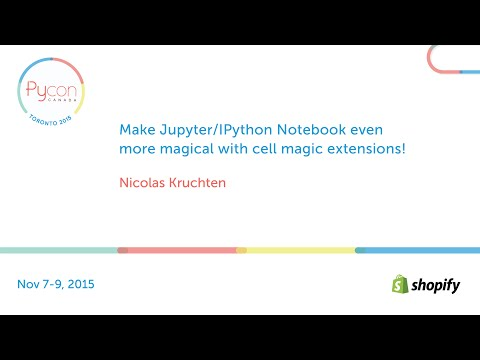

In [20]:
from IPython.display import YouTubeVideo


YouTubeVideo('zxkdO07L29Q', width=800, height=450)